In [3]:
import os, sys, pathlib, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation
from skimage.io import imshow, imread
from skimage.color import rgb2hsv, hsv2rgb

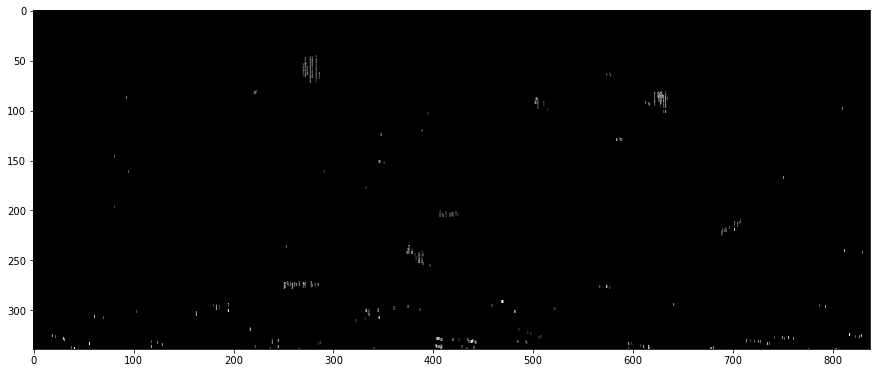

In [3]:
img = Image.open('../data/test.bmp')
gray = img.convert('L')

bitmap = np.array(gray)

plt.figure(figsize=(15,10))
plt.imshow(bitmap, cmap='gray')
plt.show()

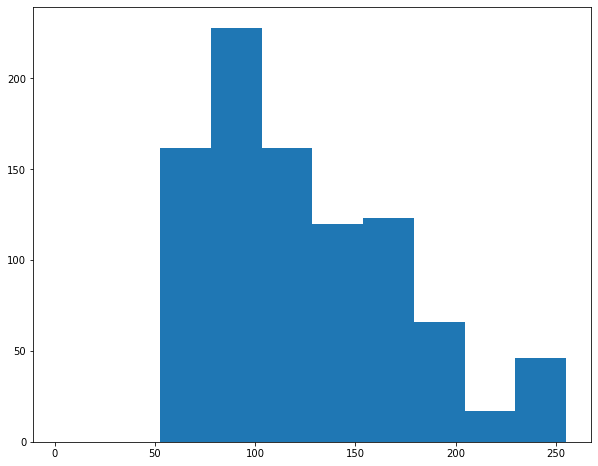

In [4]:
plt.figure(figsize=(10,8))
plt.hist(bitmap.flatten(),range=(2,255))
plt.show()

In [5]:
x,y = np.where(bitmap>2)

X = np.array([[xs,ys] for xs,ys in zip(x,y)])

# X = StandardScaler().fit_transform(X)

(array([ 88,  96,  97, 105, 106, 107, 114, 115, 121, 136, 137, 138, 139,
        144, 145, 146, 153, 154, 179, 189, 201, 236, 288, 290, 291, 292,
        293, 294, 299, 302, 303, 304, 305, 306, 307, 308, 309, 322, 323,
        324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336,
        337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 427,
        440, 442, 444, 452, 457, 463, 464, 471, 478, 508, 509, 510, 570,
        571, 581, 582, 583, 590, 591, 592, 595, 596, 597, 598, 599, 600,
        601, 602, 603, 606, 607, 608, 609, 613, 614, 615, 616, 617, 618,
        622, 623, 624, 625, 626, 627, 630, 631, 632, 633, 636, 637, 638,
        639, 642, 645, 646, 647, 648, 649, 650, 653, 654, 655, 656, 657,
        658, 662, 663, 664, 665, 667, 668, 671, 673, 674, 676, 677, 678,
        679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691,
        692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704,
        705, 706, 707, 708, 709, 710, 714, 715, 716

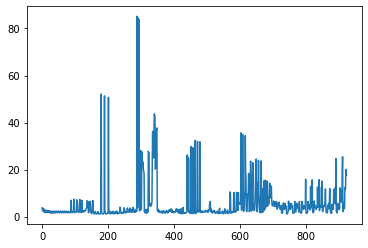

In [6]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 10)
# fit model
nbrs.fit(X)


distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

outlier_index = np.where(distances.mean(axis = 1) > 4)
outlier_index

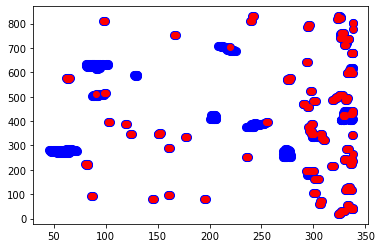

In [7]:
outlier_values = X[outlier_index]
outlier_values
plt.scatter(X[:,0], X[:,1], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values[:,0], outlier_values[:,1], color = "r")

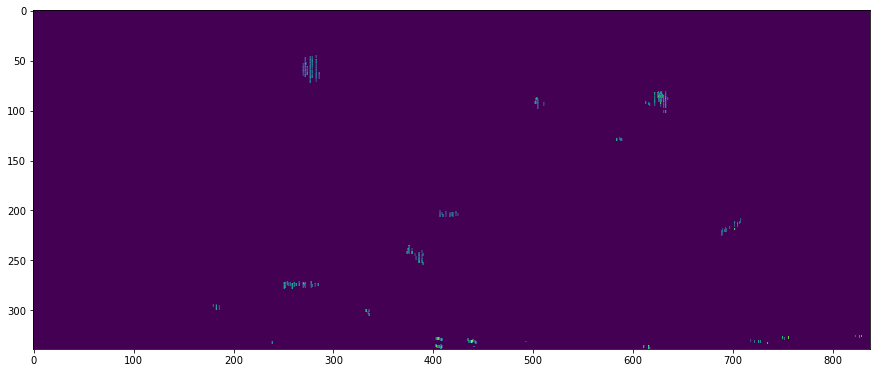

In [8]:
bitmap2 = np.array(gray)
bitmap2[outlier_values[:,0],outlier_values[:,1]] = 0

plt.figure(figsize=(15,10))
plt.imshow(bitmap2)
plt.show()




In [9]:

def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output



kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Convolve and Save Output
output = convolve2D(bitmap2, kernel, padding=0,strides=1)

cv2.imwrite('2DConvolved.jpg', output)

True

In [33]:


x,y = np.where(bitmap>2)


X = [[xs,ys] for xs,ys in zip(x,y)]


from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 20, radius=2)
# fit model
nbrs.fit(X)


distances, indexes = nbrs.kneighbors(np.array(X))
# plot mean of k-distances of each observation
print(np.shape(X),np.shape(distances), np.shape(indexes))


seeds_size = int(len(X)*0.1)
seed_indexes = random.sample(list(np.arange(0,len(X))),seeds_size)
print(seed_indexes)


(924, 2) (924, 20) (924, 20)
[715, 890, 513, 732, 384, 400, 367, 701, 882, 724, 19, 896, 5, 546, 804, 735, 396, 449, 909, 527, 627, 435, 743, 888, 730, 127, 665, 304, 152, 622, 281, 480, 426, 189, 738, 112, 740, 877, 666, 390, 146, 2, 510, 907, 74, 325, 813, 347, 544, 431, 105, 339, 17, 82, 167, 516, 22, 175, 628, 578, 822, 294, 503, 412, 355, 703, 651, 610, 866, 303, 374, 44, 834, 394, 679, 278, 501, 31, 460, 195, 216, 864, 56, 336, 329, 362, 596, 902, 382, 174, 710, 905]


In [53]:
distance_limit = 5
regions = []
assigned_points = []
for ls in list(seed_indexes):
    S = set()
    S.add(ls)
    R = []
    while len(S)>0:
        p = S.pop()
        for d,ix in zip(distances[p],indexes[p]):
            if d<=distance_limit and ix not in assigned_points:
                S.add(ix)
                R.append(ix)
                assigned_points.append(ix)
    if len(R)>0:
        regions.append(R)





In [54]:
len(regions)

45

In [93]:
import matplotlib.cm as cm
outliers = []
points = np.array(X)
colors = cm.rainbow(np.linspace(0, 1, len(regions)))

plt.figure(figsize=(10,10))

for region,c in zip(regions,colors):
    region_points = points[region]
    if len(region_points)>10:
        plt.scatter(region_points[:,0],region_points[:,1],c=[c]*len(region_points))
    else:
        plt.scatter(region_points[:,0],region_points[:,1],c=[0]*len(region_points))
        outliers += [list(region_points)]

plt.colorbar()
plt.show()

In [97]:
from skimage.draw import polygon_perimeter,polygon
bitmap3 = np.array(gray)


plt.figure(figsize=(15,10))


for region,c in zip(regions,colors):
    region_points = points[region]
    if len(region_points)>10:
        rr, cc = polygon(region_points[:,0],region_points[:,1], shape=bitmap3.shape)#, clip=False)

        bitmap3[rr,cc] = 255


plt.imshow(bitmap3,cmap="gray")
plt.show()

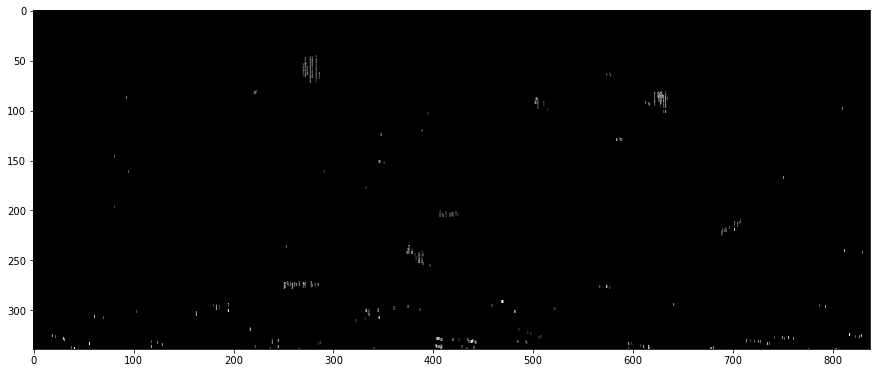

In [95]:
plt.figure(figsize=(15,10))
plt.imshow(bitmap,cmap="gray")
plt.show()

In [24]:
image = imread('../data/echogram3.png')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(image)

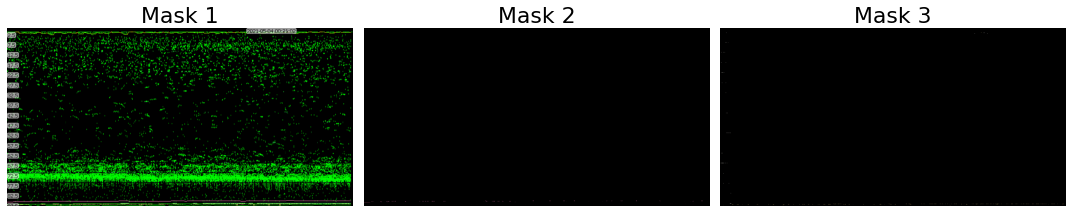

In [25]:
image_hsv = rgb2hsv(image[:,:,:-1])
titles = ['Mask 1','Mask 2','Mask 3']
f_size = 22

#Sky Filter
lower_mask_1 = image_hsv [:,:,0] > 0.45
upper_mask_1 = image_hsv [:,:,0] < 0.75
saturation_1 = image_hsv [:,:,1] > 0.15
mask_1= lower_mask_1*upper_mask_1*saturation_1

#Red Filter
lower_mask_2 = image_hsv [:,:,0] > 0.90
upper_mask_2 = image_hsv [:,:,0] < 1.00
saturation_2 = image_hsv [:,:,1] > 0.50
mask_2= lower_mask_2*upper_mask_2*saturation_2


#Earth Fikter
lower_mask_3 = image_hsv [:,:,0] > 0.05
upper_mask_3 = image_hsv [:,:,0] < 0.15
saturation_3 = image_hsv [:,:,1] < 0.75
value_3 = image_hsv [:,:,2] < 0.70
mask_3= lower_mask_3*upper_mask_3*saturation_3*value_3
sky_filtered = np.dstack((image[:,:,0]*(1-mask_1),
                            image[:,:,1]*(1-mask_1),
                            image[:,:,2]*(1-mask_1)))

red_filtered = np.dstack((image[:,:,0]*mask_2,
                            image[:,:,1]*mask_2,
                            image[:,:,2]*mask_2))
    
earth_filtered = np.dstack((image[:,:,0]*mask_3,
                            image[:,:,1]*mask_3,
                            image[:,:,2]*mask_3))

images = [sky_filtered,red_filtered,earth_filtered]

fig, ax = plt.subplots(1, 3, figsize=(15,12))
for n, ax in enumerate(ax.flatten()):
    ax.set_title(f'{titles[n]}', fontsize = f_size)
    ax.imshow(images[n])
    ax.set_axis_off()

fig.tight_layout()


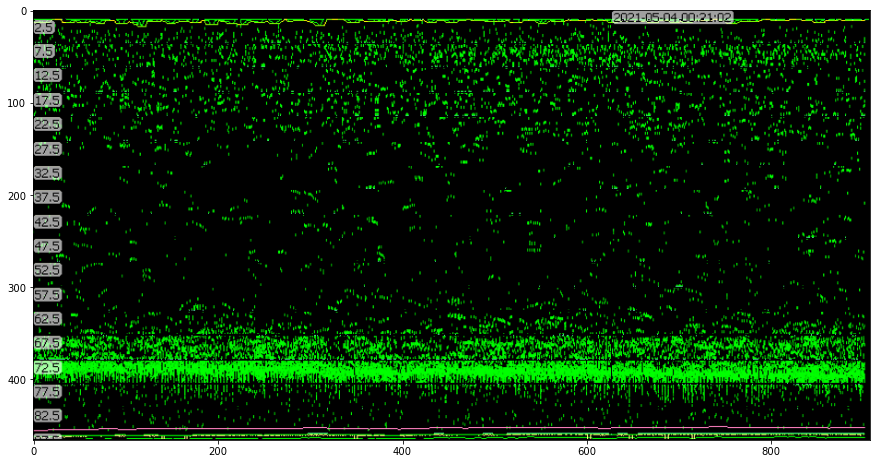

In [26]:
plt.figure(figsize=(15,10))
plt.imshow(image[:,:,:3] * (1-np.expand_dims(mask_1,-1)))

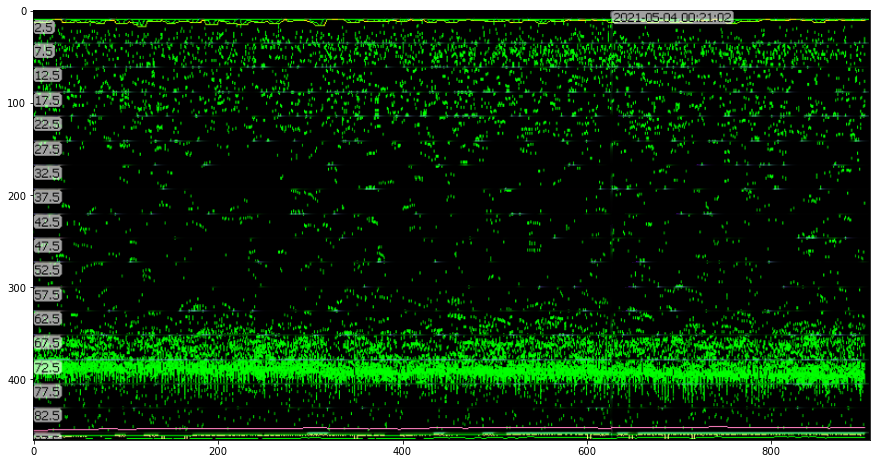

In [43]:
m = np.array(mask_1,dtype='uint8')
restored = cv2.inpaint(image[:,:,:3], m, 5, cv2.INPAINT_NS)
plt.figure(figsize=(15,10))
plt.imshow(restored)